In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [ ]:
file_path = "global_superstore_2016.xlsx"
df = pd.read_excel(file_path)

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (51290, 24)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [ ]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2014-05-11 21:26:49.155780608,2014-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.478567
min,1.00000,2012-01-01 00:00:00,2012-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,12823.25000,2013-06-19 00:00:00,2013-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2014-07-08 00:00:00,2014-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2015-05-22 00:00:00,2015-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2015-12-31 00:00:00,2016-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.251373


In [ ]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")
print(df.columns)

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Postal_Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product_ID', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority'],
      dtype='object')


In [ ]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

In [ ]:
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Month_Name'] = df['Order_Date'].dt.strftime("%B")

df[['Order_Date','Year','Month','Month_Name']].head()

,Order_Date,Year,Month,Month_Name
0,2014-11-11,2014,11,November
1,2014-02-05,2014,2,February
2,2014-10-17,2014,10,October
3,2014-01-28,2014,1,January
4,2014-11-05,2014,11,November


In [ ]:
df.isnull().sum()

,0
Row_ID,0
Order_ID,0
Order_Date,0
Ship_Date,0
Ship_Mode,0
Customer_ID,0
Customer_Name,0
Segment,0
Postal_Code,41296
City,0


In [ ]:
df["Total_Cost"] = df["Sales"] - df["Profit"]
df[["Sales", "Profit", "Total_Cost"]].head()

,Sales,Profit,Total_Cost
0,221.980,62.1544,159.8256
1,3709.395,-288.7650,3998.1600
2,5175.171,919.9710,4255.2000
3,2892.510,-96.5400,2989.0500
4,2832.960,311.5200,2521.4400


In [ ]:
df["Discount_Amount"] = df["Discount"] * df["Sales"]
df[["Sales", "Discount", "Discount_Amount"]].head()

,Sales,Discount,Discount_Amount
0,221.980,0.0,0.0000
1,3709.395,0.1,370.9395
2,5175.171,0.1,517.5171
3,2892.510,0.1,289.2510
4,2832.960,0.0,0.0000


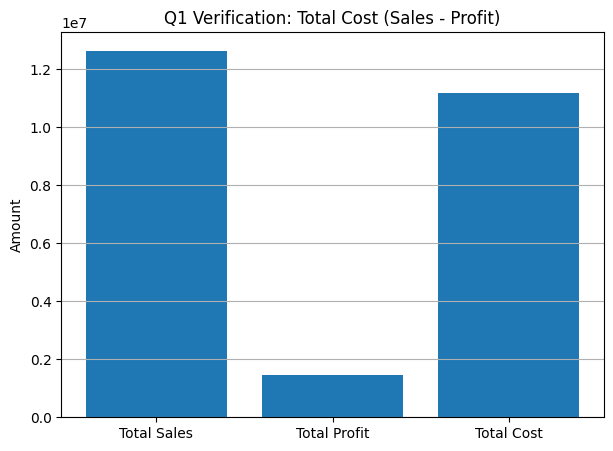

Total Cost: 11175044.6186


In [ ]:
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
total_cost = df["Total_Cost"].sum()

plt.figure(figsize=(7,5))
plt.bar(["Total Sales", "Total Profit", "Total Cost"], [total_sales, total_profit, total_cost])
plt.title("Q1 Verification: Total Cost (Sales - Profit)")
plt.ylabel("Amount")
plt.grid(axis="y")
plt.show()

print("Total Cost:", total_cost)

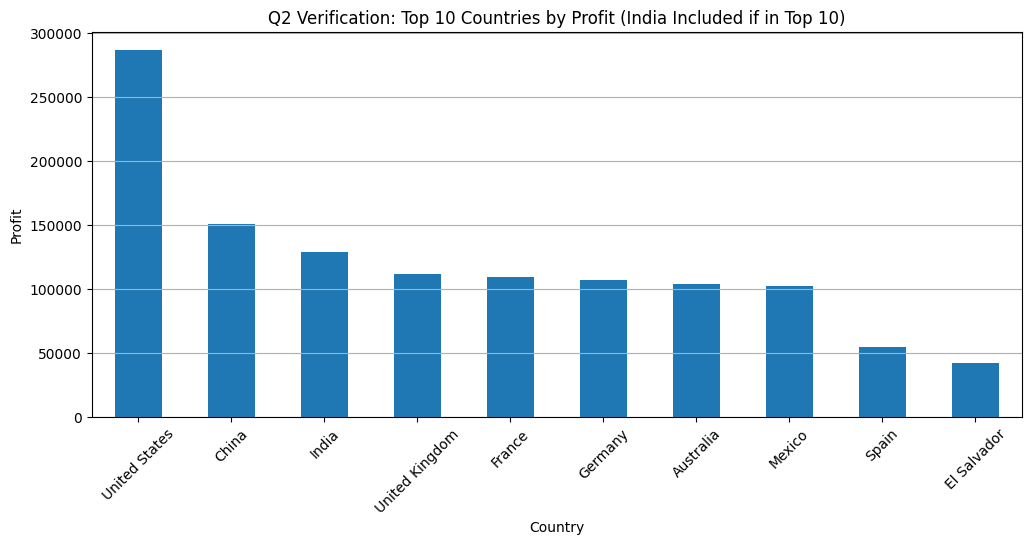

Total Profit in India: 129050.595


In [ ]:
profit_by_country = df.groupby("Country")["Profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
profit_by_country.head(10).plot(kind="bar")
plt.title("Q2 Verification: Top 10 Countries by Profit (India Included if in Top 10)")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

print("Total Profit in India:", df[df["Country"]=="India"]["Profit"].sum())

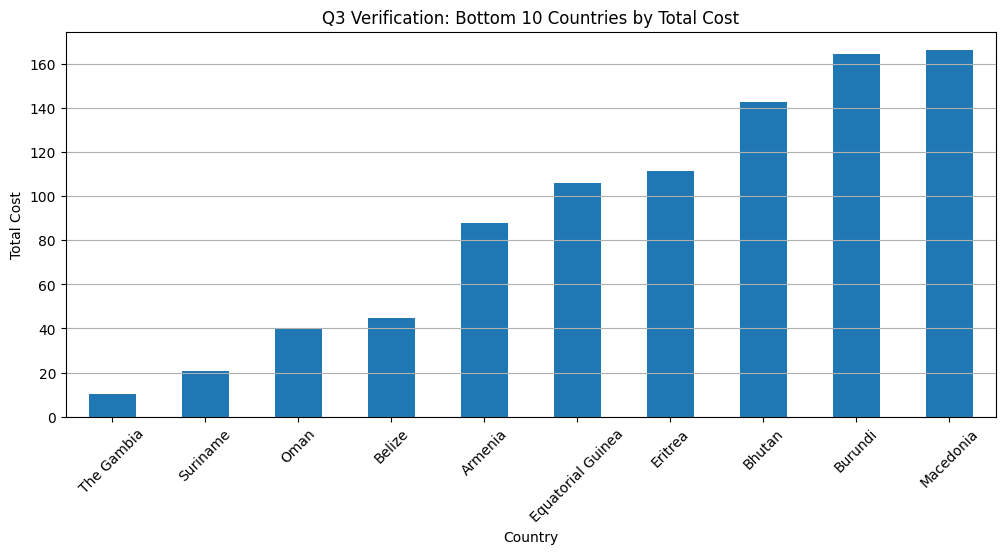

Last 5th Country by Cost: Armenia
Cost Value: 87.66


In [ ]:
cost_by_country = df.groupby("Country")["Total_Cost"].sum().sort_values()

plt.figure(figsize=(12,5))
cost_by_country.head(10).plot(kind="bar")
plt.title("Q3 Verification: Bottom 10 Countries by Total Cost")
plt.ylabel("Total Cost")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

print("Last 5th Country by Cost:", cost_by_country.index[4])
print("Cost Value:", cost_by_country.iloc[4])

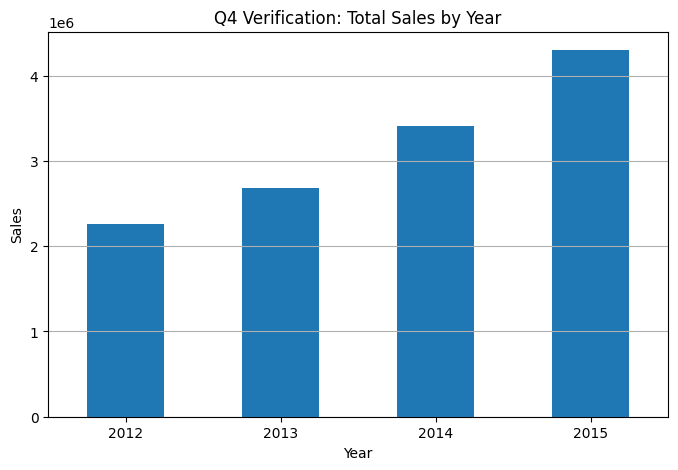

Total Sales in 2015: 4299865.870560001


In [ ]:
sales_by_year = df.groupby("Year")["Sales"].sum()

plt.figure(figsize=(8,5))
sales_by_year.plot(kind="bar")
plt.title("Q4 Verification: Total Sales by Year")
plt.ylabel("Sales")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

print("Total Sales in 2015:", df[df["Year"]==2015]["Sales"].sum())

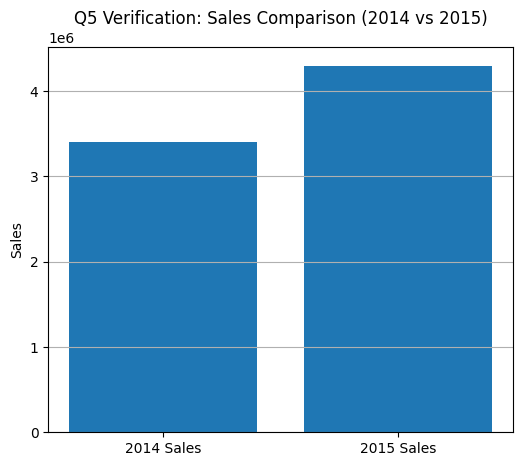

Difference (2015 - 2014): 894119.4211800005


In [ ]:
sales_2014 = df[df["Year"]==2014]["Sales"].sum()
sales_2015 = df[df["Year"]==2015]["Sales"].sum()

plt.figure(figsize=(6,5))
plt.bar(["2014 Sales", "2015 Sales"], [sales_2014, sales_2015])
plt.title("Q5 Verification: Sales Comparison (2014 vs 2015)")
plt.ylabel("Sales")
plt.grid(axis="y")
plt.show()

print("Difference (2015 - 2014):", sales_2015 - sales_2014)

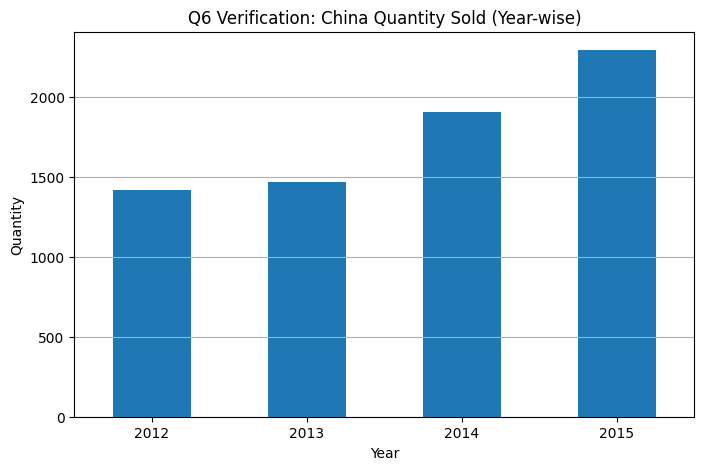

China Quantity Sold in 2015: 2293


In [ ]:
china_data = df[df["Country"]=="China"]
china_qty_by_year = china_data.groupby("Year")["Quantity"].sum()

plt.figure(figsize=(8,5))
china_qty_by_year.plot(kind="bar")
plt.title("Q6 Verification: China Quantity Sold (Year-wise)")
plt.ylabel("Quantity")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

print("China Quantity Sold in 2015:", df[(df["Country"]=="China") & (df["Year"]==2015)]["Quantity"].sum())

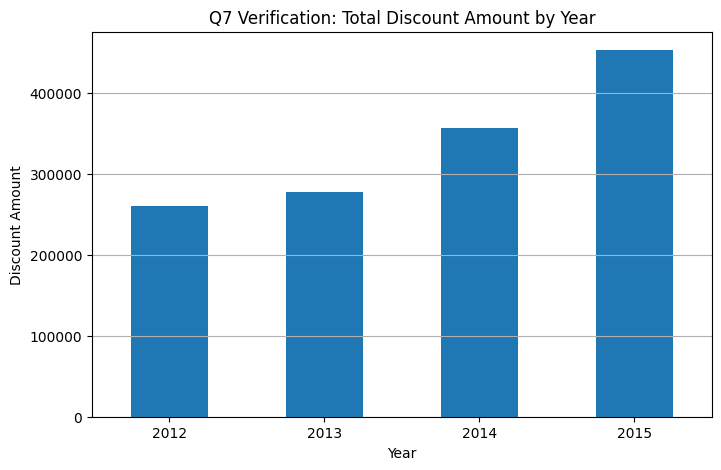

Total Discount Amount: 1346352.04021416


In [ ]:
discount_by_year = df.groupby("Year")["Discount_Amount"].sum()

plt.figure(figsize=(8,5))
discount_by_year.plot(kind="bar")
plt.title("Q7 Verification: Total Discount Amount by Year")
plt.ylabel("Discount Amount")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

print("Total Discount Amount:", df["Discount_Amount"].sum())

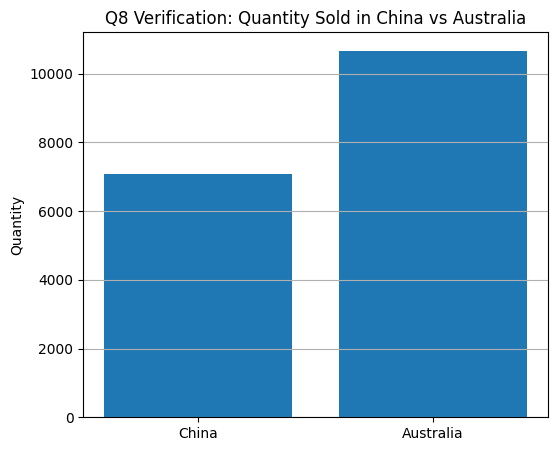

China Quantity: 7081
Australia Quantity: 10673
China + Australia Quantity: 17754


In [ ]:
china_qty = df[df["Country"]=="China"]["Quantity"].sum()
aus_qty = df[df["Country"]=="Australia"]["Quantity"].sum()

plt.figure(figsize=(6,5))
plt.bar(["China", "Australia"], [china_qty, aus_qty])
plt.title("Q8 Verification: Quantity Sold in China vs Australia")
plt.ylabel("Quantity")
plt.grid(axis="y")
plt.show()

print("China Quantity:", china_qty)
print("Australia Quantity:", aus_qty)
print("China + Australia Quantity:", china_qty + aus_qty)

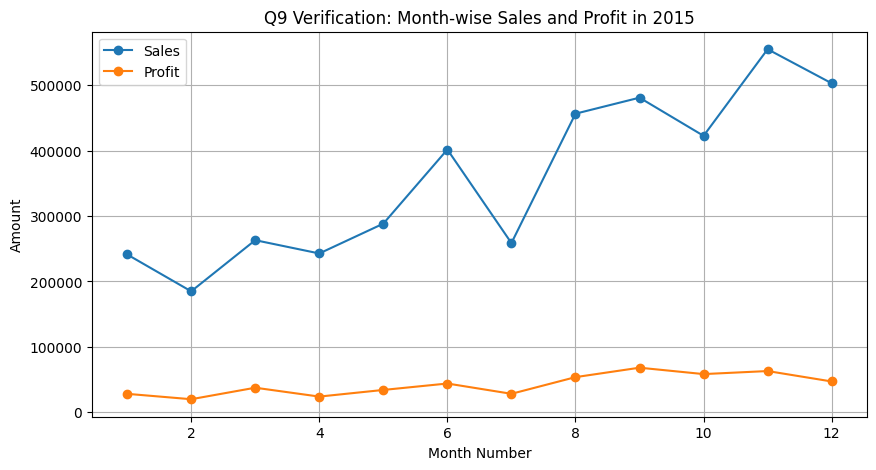

July 2015 Sales: 258705.68048
July 2015 Profit: 28035.87258
July 2015 Cost: 230669.80789999999


In [ ]:
data_2015 = df[df["Year"]==2015]
monthly_sales_2015 = data_2015.groupby("Month")["Sales"].sum()
monthly_profit_2015 = data_2015.groupby("Month")["Profit"].sum()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales_2015.index, monthly_sales_2015.values, marker="o", label="Sales")
plt.plot(monthly_profit_2015.index, monthly_profit_2015.values, marker="o", label="Profit")
plt.title("Q9 Verification: Month-wise Sales and Profit in 2015")
plt.xlabel("Month Number")
plt.ylabel("Amount")
plt.grid(True)
plt.legend()
plt.show()

july_sales = df[(df["Year"]==2015) & (df["Month"]==7)]["Sales"].sum()
july_profit = df[(df["Year"]==2015) & (df["Month"]==7)]["Profit"].sum()
july_cost = df[(df["Year"]==2015) & (df["Month"]==7)]["Total_Cost"].sum()

print("July 2015 Sales:", july_sales)
print("July 2015 Profit:", july_profit)
print("July 2015 Cost:", july_cost)

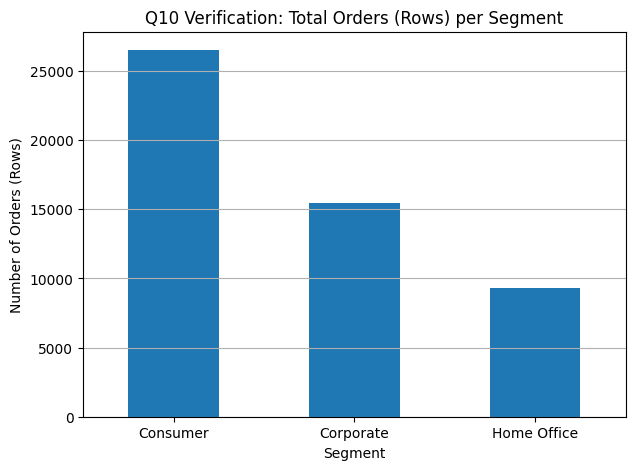

Consumer Segment Orders: 26518


In [ ]:
segment_orders = df.groupby("Segment").size()

plt.figure(figsize=(7,5))
segment_orders.plot(kind="bar")
plt.title("Q10 Verification: Total Orders (Rows) per Segment")
plt.ylabel("Number of Orders (Rows)")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

print("Consumer Segment Orders:", df[df["Segment"]=="Consumer"].shape[0])

In [ ]:
print("========== FINAL VERIFIED ANSWERS ==========")

print("1) Total Cost:", round(df["Total_Cost"].sum(), 4))

print("2) Total Profit in India:", round(df[df["Country"]=="India"]["Profit"].sum(), 3))

cost_country = df.groupby("Country")["Total_Cost"].sum().sort_values()
print("3) Last 5th country on basis of cost:", cost_country.index[4])

print("4) Total Sales in 2015:", round(df[df["Year"]==2015]["Sales"].sum(), 2))

sales_2015 = df[df["Year"]==2015]["Sales"].sum()
sales_2014 = df[df["Year"]==2014]["Sales"].sum()
print("5) Difference (2015 - 2014):", round(sales_2015 - sales_2014, 2))

print("6) China Quantity Sold in 2015:", df[(df["Country"]=="China") & (df["Year"]==2015)]["Quantity"].sum())

print("7) Total Discount Amount:", round(df["Discount_Amount"].sum(), 2))

print("8) China + Australia Quantity:", df[df["Country"].isin(["China","Australia"])]["Quantity"].sum())

july = df[(df["Year"]==2015) & (df["Month"]==7)]
print("9) July 2015 Sales:", round(july["Sales"].sum(), 2), "| July 2015 Profit:", round(july["Profit"].sum(), 2))

print("10) Consumer Segment Orders:", df[df["Segment"]=="Consumer"].shape[0])

========== FINAL VERIFIED ANSWERS ==========
1) Total Cost: 11175044.6186
2) Total Profit in India: 129050.595
3) Last 5th country on basis of cost: Armenia
4) Total Sales in 2015: 4299865.87
5) Difference (2015 - 2014): 894119.42
6) China Quantity Sold in 2015: 2293
7) Total Discount Amount: 1346352.04
8) China + Australia Quantity: 17754
9) July 2015 Sales: 258705.68 | July 2015 Profit: 28035.87
10) Consumer Segment Orders: 26518


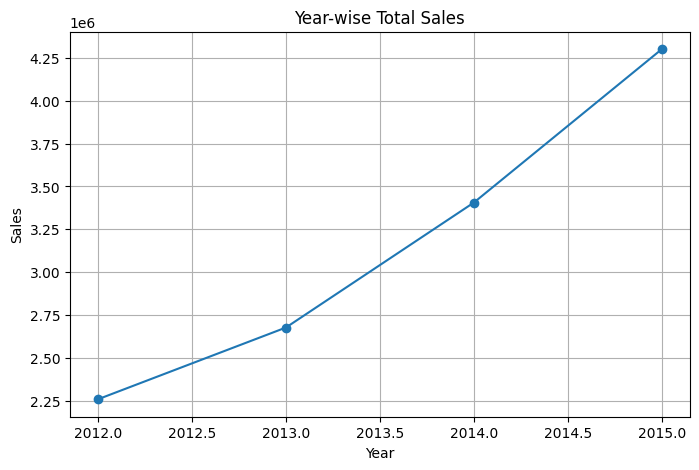

In [ ]:
year_sales = df.groupby("Year")["Sales"].sum()

plt.figure(figsize=(8,5))
plt.plot(year_sales.index, year_sales.values, marker="o")
plt.title("Year-wise Total Sales")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

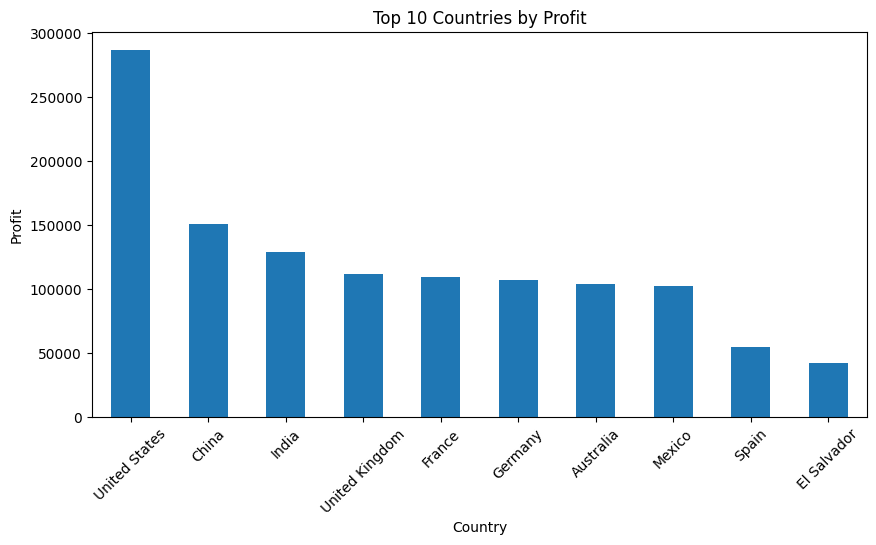

In [ ]:
top_countries_profit = df.groupby("Country")["Profit"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_countries_profit.plot(kind="bar")
plt.title("Top 10 Countries by Profit")
plt.xlabel("Country")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.show()

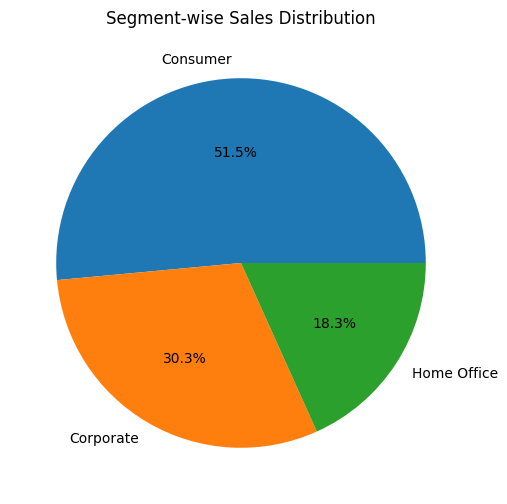

In [ ]:
segment_sales = df.groupby("Segment")["Sales"].sum()

plt.figure(figsize=(6,6))
segment_sales.plot(kind="pie", autopct="%1.1f%%")
plt.title("Segment-wise Sales Distribution")
plt.ylabel("")
plt.show()

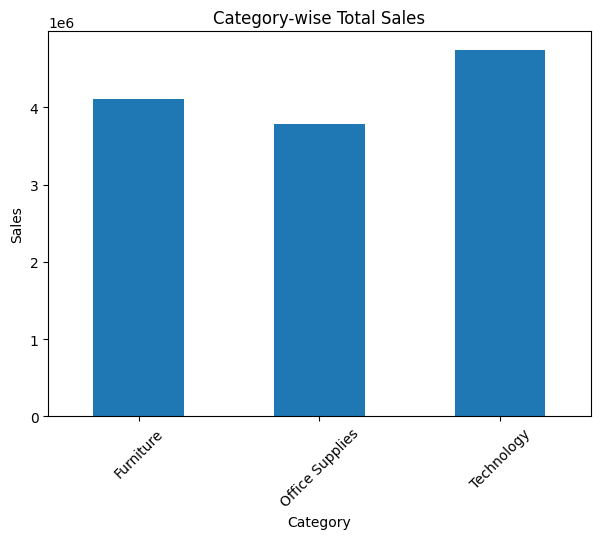

In [ ]:
category_sales = df.groupby("Category")["Sales"].sum()

plt.figure(figsize=(7,5))
category_sales.plot(kind="bar")
plt.title("Category-wise Total Sales")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

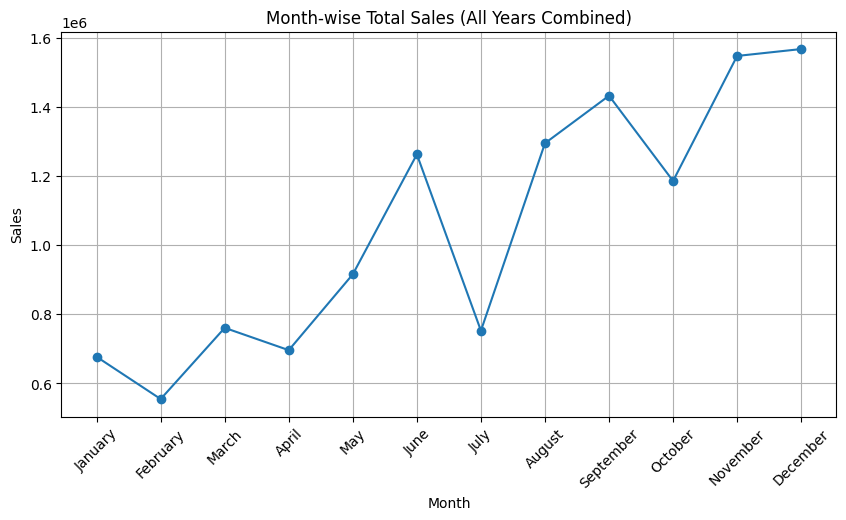

In [ ]:
monthly_sales = df.groupby("Month_Name")["Sales"].sum()

# Order months properly
month_order = ["January","February","March","April","May","June","July","August",
               "September","October","November","December"]

monthly_sales = monthly_sales.reindex(month_order)

plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker="o")
plt.title("Month-wise Total Sales (All Years Combined)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

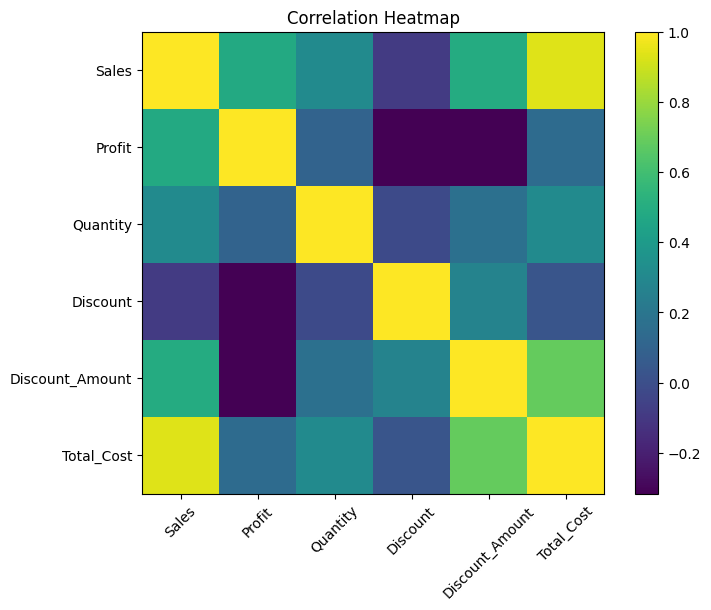

In [ ]:
corr = df[["Sales","Profit","Quantity","Discount","Discount_Amount","Total_Cost"]].corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="viridis", interpolation="nearest")
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Heatmap")
plt.show()